# Data dictionary
1. Definition of predictors
2. Unique identifier of each table (or Primary keys)
3. Foreign keys or matching keys between tables
4. Explanation of values in case of Categorial variables

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

boston_data = load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# EDD

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [45]:
df.shape

(506, 14)

In [46]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Ищем пропуски и выбросы. Нет быстрого способа, это итерационный пррцесс
- смотрим на разницу mean и median, выбросы влияют только на mean
- если max и min сильно выделяются из распределния 25%..75%, то распределение скошено или есть выбросы (1.5 интерквартильных размаха от median)

In [47]:
outliers = ['CRIM', 'RAD', 'ZN', 'AGE', 'DIS', 'B', ]

for col in df.columns:
    print(f'{col}: {len(df[col].unique())}')

CRIM: 504
ZN: 26
INDUS: 76
CHAS: 2
NOX: 81
RM: 446
AGE: 356
DIS: 412
RAD: 9
TAX: 66
PTRATIO: 46
B: 357
LSTAT: 455
target: 229


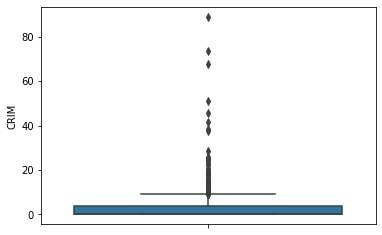

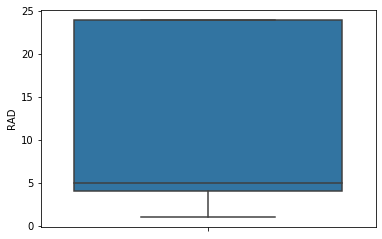

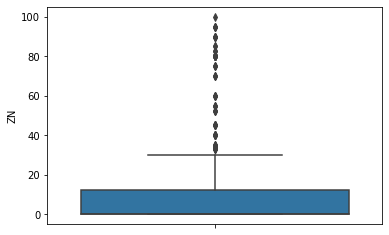

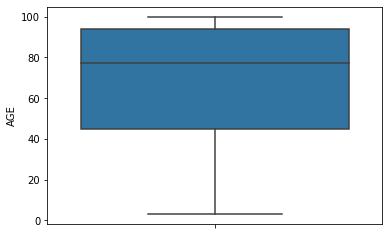

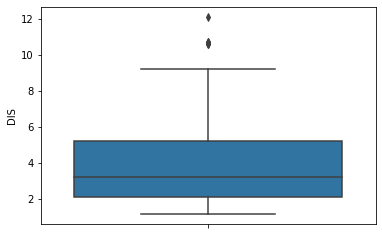

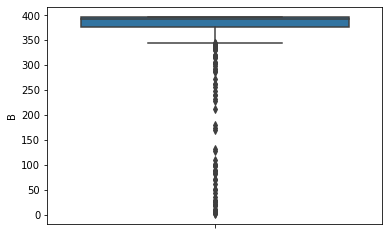

In [48]:
for outlier in outliers:
    sns.boxplot(y=outlier, data=df); plt.show()

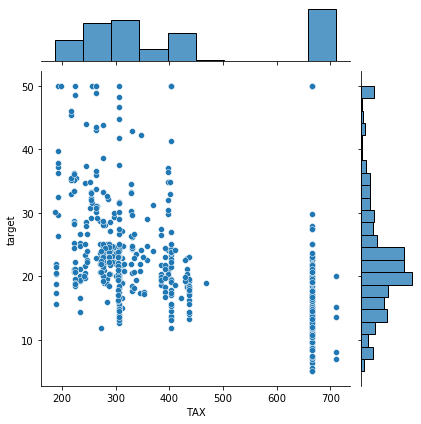

In [68]:
sns.jointplot(x='TAX', y='target', data=df);

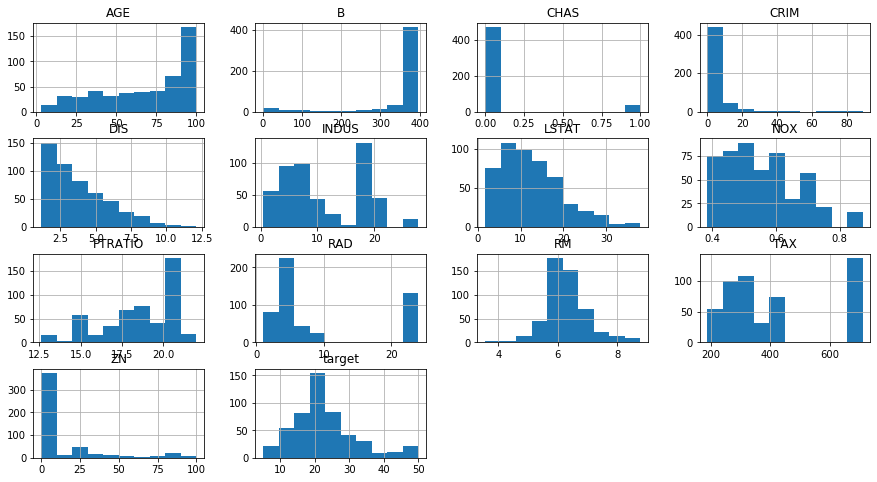

In [65]:
df.hist(figsize=(15,8));

### Категориальные перменные

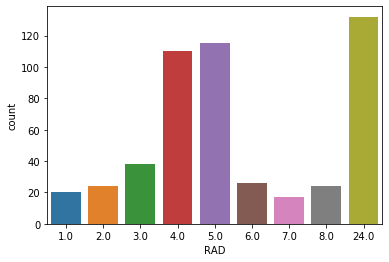

In [69]:
sns.countplot(x='RAD', data=df);

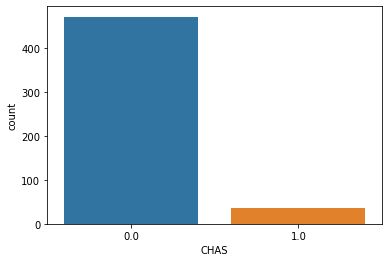

In [53]:
sns.countplot(x='CHAS', data=df);

### Выводы:
- пропуски данных
- выбросы
- скошенные распределения

# Outlier treatment 

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64
lv=13.0; uv=21.2


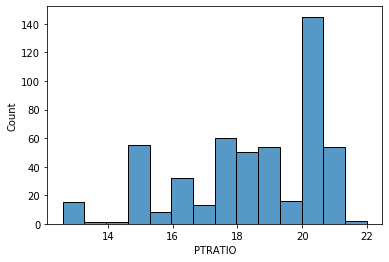

In [77]:
import numpy as np
feature = 'PTRATIO'
sns.histplot(df[feature])
print(df[feature].describe())
lv,uv = np.percentile(df[feature],[1,99])
print(f'lv={lv}; uv={uv}')

In [83]:
df[df[feature]>uv]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4.0,334.0,22.0,382.80,8.05,18.2
355,0.10659,80.0,1.91,0.0,0.413,5.936,19.5,10.5857,4.0,334.0,22.0,376.04,5.57,20.6


In [84]:
df[df[feature]>uv*3] = 3*uv

In [86]:
df[df[feature]<lv]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
196,0.04011,80.0,1.52,0.0,0.404,7.287,34.1,7.309,2.0,329.0,12.6,396.90,4.08,33.3
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.309,2.0,329.0,12.6,354.31,8.61,30.3
198,0.03768,80.0,1.52,0.0,0.404,7.274,38.3,7.309,2.0,329.0,12.6,392.20,6.62,34.6


In [85]:
df[df[feature]<0.3*lv] = 0.3*lv

# Missing Value Imputation 

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


пропусков нет

In [ ]:
# impute missing
# df['feature'] = df['feature'].fillna(df['feature'].mean())

# impute all missing columns
# df = df.fillna(df.mean, axis=1)

# Variable transformation and Deletion 

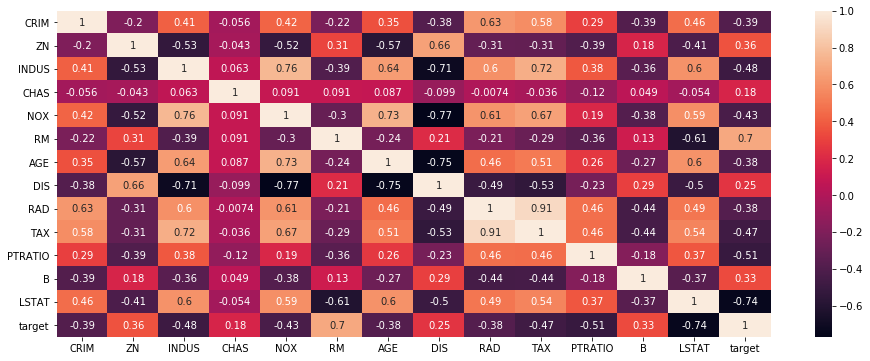

In [90]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True)

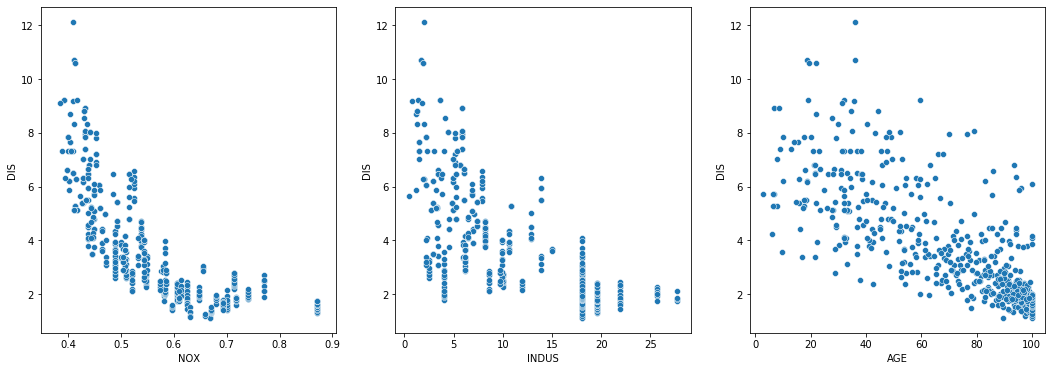

In [106]:
plt.figure(figsize=(18,6))
plt.subplot(131); sns.scatterplot(x='NOX', y='DIS', data=df);
plt.subplot(132); sns.scatterplot(x='INDUS', y='DIS', data=df);
plt.subplot(133); sns.scatterplot(x='AGE', y='DIS', data=df);

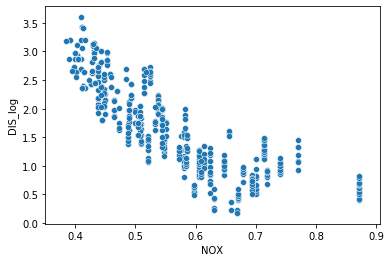

In [121]:
df['DIS_log'] = np.log2(df['DIS'])
sns.scatterplot(x='NOX', y='DIS_log', data=df);

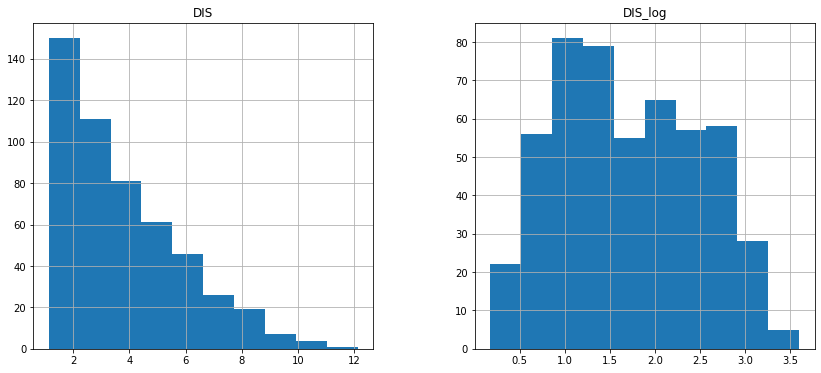

In [125]:
df[['DIS', 'DIS_log']].hist(figsize=(14,6));

# Dummy variable creation 

In [ ]:
df = pd.get_dummies(df)